# Exploratory Data Analysis - Terrorism

# Author - Hitesh Choudhary


### Dataset - https://www.kaggle.com/datasets/START-UMD/gtd

# Importng Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/terrorism.csv",encoding = 'latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
for i in df.columns:
  print(i,end = ", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

## Filtering Required and Relevant Columns

In [4]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill",'nwound']]

### Renaming Columns

In [5]:
df = df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type", "nkill" : 'Killed', "nwound":"Wounded"})

In [6]:
df.shape    # Shape of data frame

(181691, 17)

In [7]:
df.dtypes     # Types of data in particular attribute

Year                int64
Month               int64
Day                 int64
Country            object
Region             object
Province/State     object
City               object
Latitude          float64
Longitude         float64
Location           object
Attack Type        object
Target Type        object
Group Name         object
Motive             object
Weapon Type        object
Killed            float64
Wounded           float64
dtype: object

In [8]:
df.describe()      # Description of column

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [9]:
df.isna().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
dtype: int64

In [10]:
df['Total_Affected'] = df['Killed'] + df['Wounded']

# Exploratory Data Analysis

## -- Year wise Attack

In [11]:
year_wise_attack = df['Year'].value_counts(dropna = False).to_frame().sort_index().reset_index().rename(columns={"index":"Year","Year":"Attacked"})
year_wise_attack.tail()

,Year,Attacked
42,2013,12036
43,2014,16903
44,2015,14965
45,2016,13587
46,2017,10900


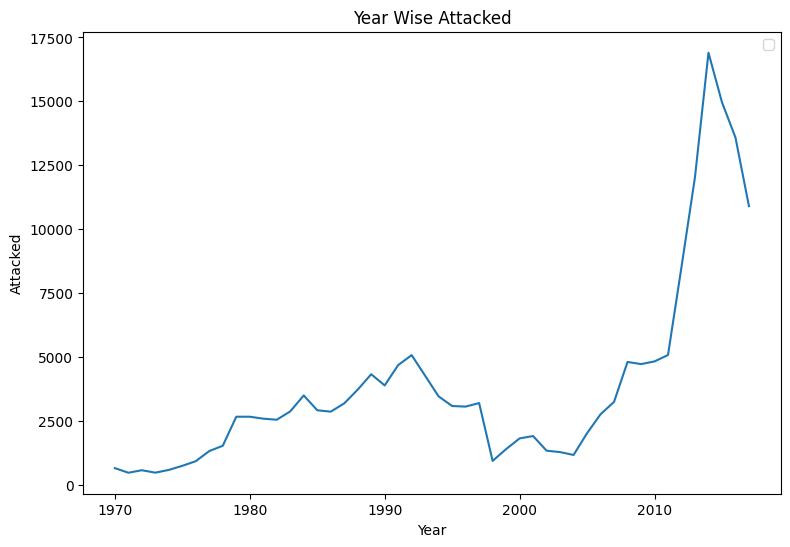

In [12]:
plt.figure(figsize=(9,6))
sns.lineplot(x = year_wise_attack['Year'], y =year_wise_attack['Attacked'])
plt.title("Year Wise Attacked")
plt.xlabel('Year')
plt.ylabel('Attacked')
plt.legend()
plt.show()

## Observations --  Year wise Attacks :


1.    Most number of attacks: **16903** in 2014
2.   Least number of attacks: **471** in 1971





--------------------------------------------------------------------------------

## -- Casaulty by year

In [13]:
Casaulity = df[["Year","Total_Affected"]].groupby('Year').sum().sort_index().reset_index().rename(columns = {'index':'Year'})
Casaulity.tail()

,Year,Total_Affected
42,2013,57679.0
43,2014,68853.0
44,2015,72833.0
45,2016,69225.0
46,2017,48208.0


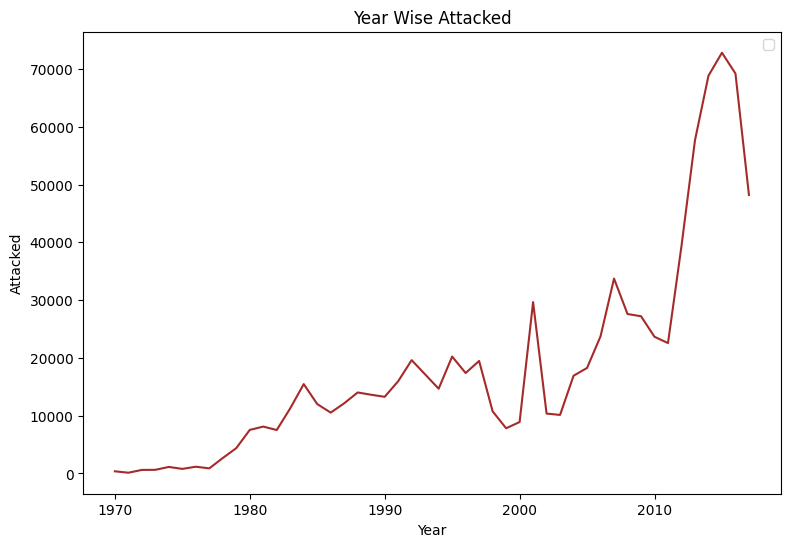

In [14]:
plt.figure(figsize=(9,6))
sns.lineplot(x = Casaulity['Year'], y = Casaulity['Total_Affected'] , color = 'brown')
plt.title("Year Wise Attacked")
plt.xlabel('Year')
plt.ylabel('Attacked')
plt.legend()
plt.show()

## Observations -- Casaulty by Year


1.   Most number of casualties: **72833** in 2014
2.   Least number of casualties: **255** in 1971



--------------------------------------------------------------------------------

## --  Killed and Wound People which were Affected due to Terrorist Attacks by Terrorists

In [70]:
killed = df[["Year","Killed"]].groupby("Year").sum().sort_values(by = 'Killed',ascending = False)
killed.tail()

,Killed
Year,
1974,539.0
1977,456.0
1973,370.0
1970,174.0
1971,173.0


In [67]:
wounded = df[["Year","Wounded"]].groupby("Year").sum().sort_values(by = 'Wounded',ascending = False)
wounded.tail(5)

,Wounded
Year,
1977,518.0
1973,495.0
1972,409.0
1970,212.0
1971,82.0


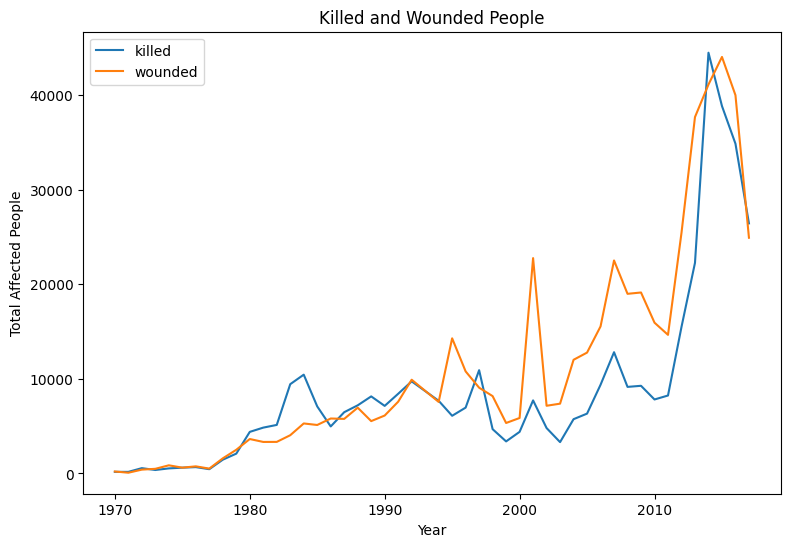

In [17]:
plt.figure(figsize = (9,6))
plt.plot(killed)
plt.plot(wounded)
plt.title("Killed and Wounded People")
plt.xlabel("Year")
plt.ylabel("Total Affected People")
plt.legend(['killed','wounded'])
plt.show()

## Observations --
Killed

*   Most number of people killed: **44490** in 2014
*   Least number of people killed: **173** in 1971

Wounded

*   Most number of people wounded: **44043** in 2015
*  Least number of people wounded: **82** in 1971


--------------------------------------------------------------------------------

## -- Region Wise Attack

In [18]:
region = df['Region'].value_counts(ascending = False).to_frame().reset_index().rename(columns = {'index':'Region','Region':'Total Region'})
region

,Region,Total Region
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


Text(0.5, 1.0, 'Region Wise Attacked')

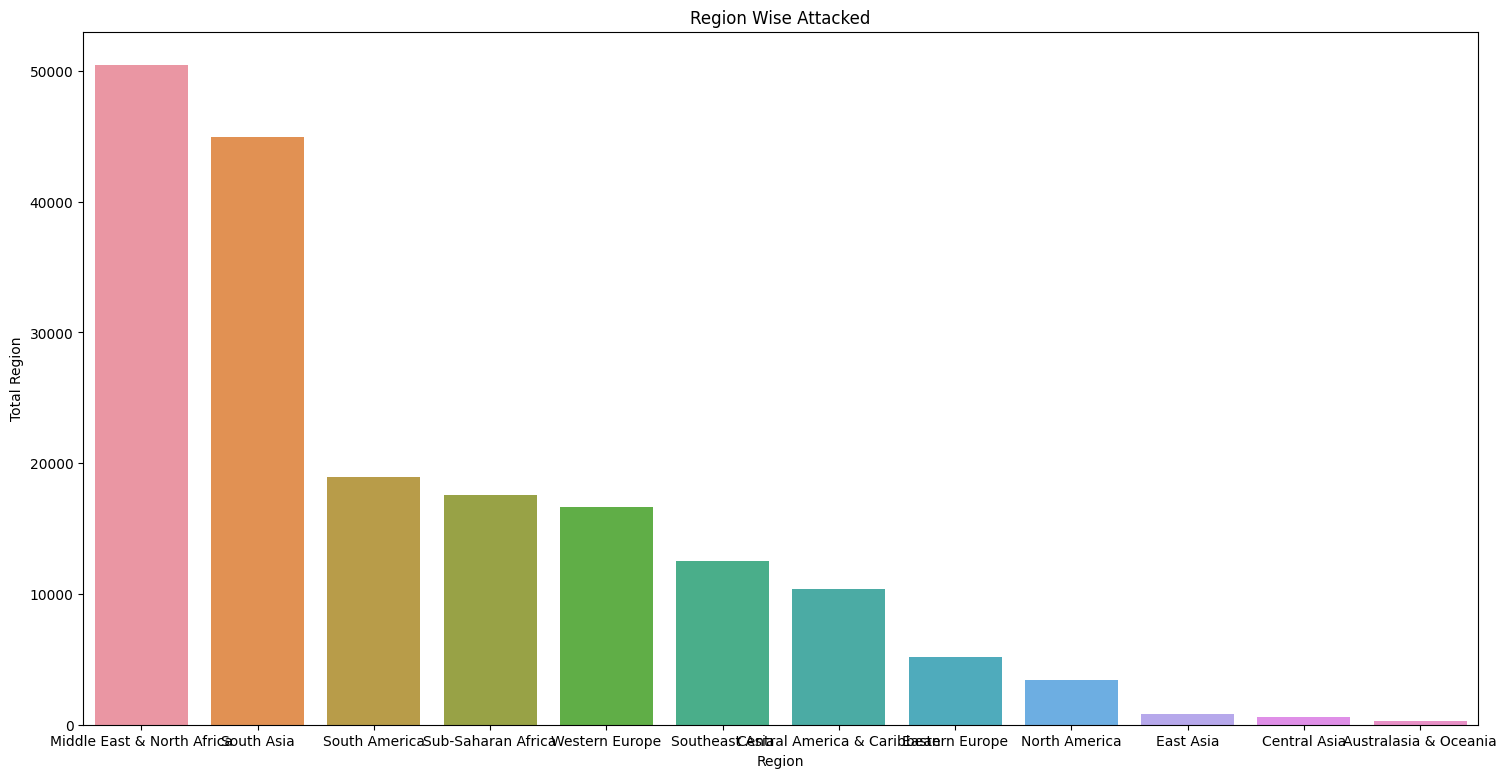

In [19]:
plt.figure(figsize = (18,9))
sns.barplot(x = region['Region'], y = region['Total Region'])
plt.title("Region Wise Attacked")

## Observation -- Region Wise Attack

*   Most number of attacks: **50474** in "Middle East & North Africa"
*   Least number of attacks:  **282** in "Australasia & Oceania"



--------------------------------------------------------------------------------

## -- Year wise Region Attacked by Terrorists

In [20]:
region_wise_attack = pd.crosstab(df['Year'],df['Region'])
region_wise_attack.head(5)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


<Axes: xlabel='Year'>

<Figure size 900x1200 with 0 Axes>

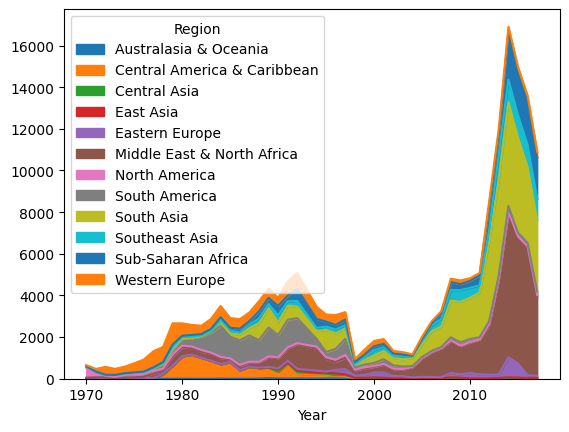

In [21]:
plt.figure(figsize = (9,12))
region_wise_attack.plot(kind = 'area')

## Observations --  Casualties by Region

*   Most number of casualties: **351950** in "Middle East & North Africa"
*   Least number of casualties: **410** in "Australasia & Oceania"



--------------------------------------------------------------------------------

# -- Country wise Attack Top 10

In [22]:
country_counts = df['Country'].value_counts().head(10).to_frame()
country_counts

,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


Text(0, 0.5, 'Total_Attacked')

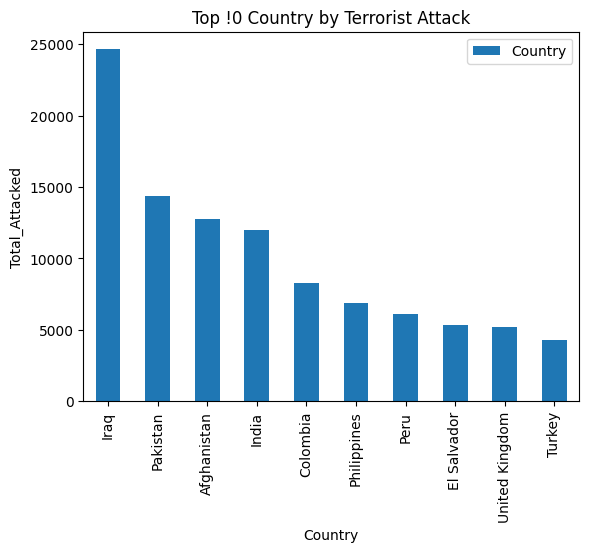

In [23]:
country_counts.plot(kind = 'bar')
plt.title("Top !0 Country by Terrorist Attack")
plt.xlabel("Country")
plt.ylabel("Total_Attacked")

## Observations -- Top 10 Country by Attack

*   Most number of attacks: **24636** in "Iraq"
*   Least number of attacks: **4292** in "Turkey"



--------------------------------------------------------------------------------

## -- Top 10 Country by Total Casaulity

In [24]:
casaulity_country = df[["Country","Total_Affected"]].groupby("Country").sum().sort_values(by = 'Total_Affected', ascending =  False).rename({"index": "Country"},axis = 1).reset_index().head(10)
casaulity_country

,Country,Total_Affected
0,Iraq,202982.0
1,Afghanistan,80213.0
2,Pakistan,64427.0
3,India,47108.0
4,Sri Lanka,29792.0
5,United States,24469.0
6,Colombia,23767.0
7,Philippines,22361.0
8,Nigeria,21728.0
9,Syria,21614.0


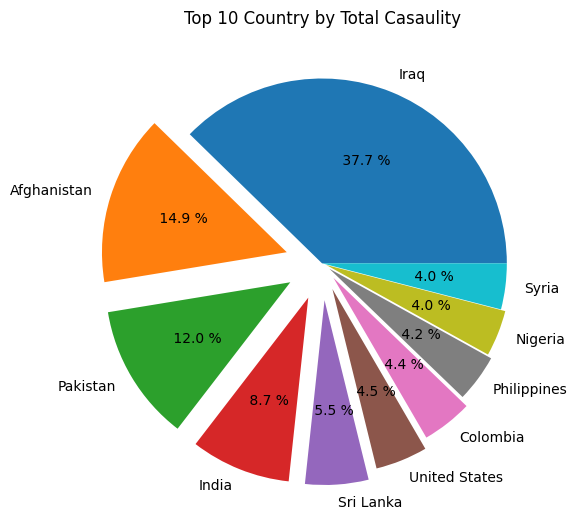

In [25]:
plt.figure(figsize =(9,6))
explode = (0.0, 0.2, 0.2, 0.2, 0.2, 0.15, 0.1, 0.05, 0.025, 0)

plt.pie(casaulity_country['Total_Affected'], labels = casaulity_country['Country'],
        explode = explode , autopct ='% 1.1f %%')
plt.title("Top 10 Country by Total Casaulity")
plt.show()

## Observations -- Top 10 Country by Total Casaulity

*   Most number of casualties: **213279** and **37.7%** in "Iraq"
*   Least number of casualties: **21614** and **4%** in  "Syria"



--------------------------------------------------------------------------------

# -- Top 10 City by Attack

In [26]:
top_10_city = df['City'].value_counts()[1:11].to_frame().reset_index().rename(columns = {"index": "City","City":"Attacks"})
top_10_city

,City,Attacks
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
5,Santiago,1621
6,Mogadishu,1581
7,San Salvador,1558
8,Istanbul,1048
9,Athens,1019


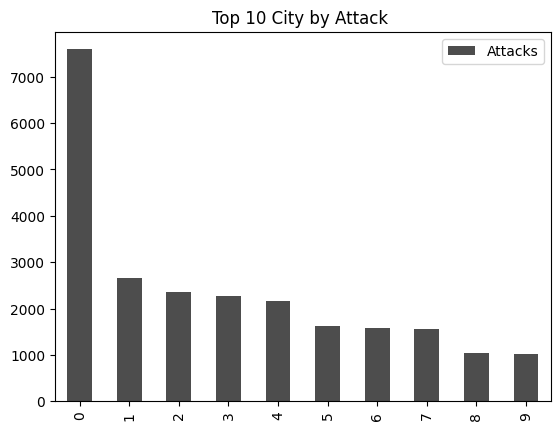

In [27]:
top_10_city.plot(kind = 'bar',color = '0.3')
plt.title("Top 10 City by Attack ")
plt.show()

## Observations -- Top 10 City by Attack

*   Most number of attacks: **7589** in "Baghdad"
*   Least number of attacks: **1019** in "Athens"



--------------------------------------------------------------------------------

## -- Total Casuality in Top 10 Cities

In [72]:
casuality_top_10_city = df[["City","Total_Affected"]].groupby("City").sum().drop("Unknown").sort_values(by = 'Total_Affected',
                                                                                        ascending = False).reset_index().rename(columns = {"index":'City'}).head(10)
casuality_top_10_city

,City,Total_Affected
0,Baghdad,76897.0
1,New York City,19618.0
2,Mosul,12360.0
3,Karachi,9201.0
4,Mogadishu,8603.0
5,Kabul,8406.0
6,Beirut,7210.0
7,Kirkuk,6499.0
8,Colombo,5852.0
9,Quetta,5589.0


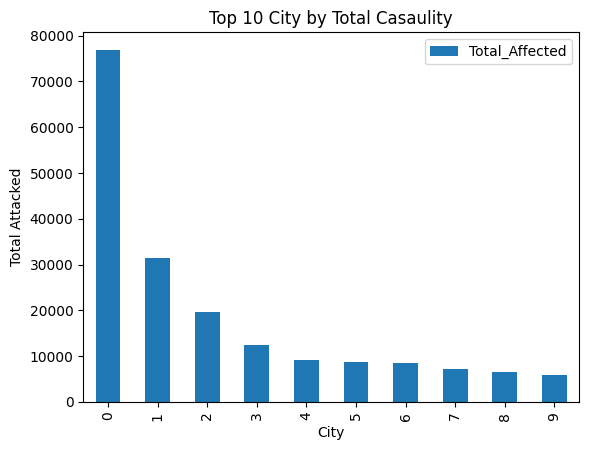

In [29]:
casuality_top_10_city.plot(kind = 'bar')
plt.title("Top 10 City by Total Casaulity")
plt.xlabel("City")
plt.ylabel("Total Attacked")
plt.show()

## Observations -- Total Casuality in Top 10 Cities

*   Most number of casualties: **76897** in "Baghdad"
*   Least number of casualties: **5589** in "Quetta"



--------------------------------------------------------------------------------

## -- Top 10 Cities by Killed and Wounded

In [30]:
city_killed = df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown").reset_index().rename(columns = {"index":"City"})
city_killed = city_killed.head(10)
city_killed

,City,Killed
0,Baghdad,21151.0
1,Mosul,7140.0
2,Mogadishu,3913.0
3,Karachi,3688.0
4,New York City,2838.0
5,Tikrit,2679.0
6,Kabul,2493.0
7,Ramadi,2313.0
8,Maiduguri,2235.0
9,Aleppo,2125.0


In [31]:
city_wounded = df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").reset_index().rename(columns = {"index":"City"})
city_wounded = city_wounded.head(10)
city_wounded

,City,Wounded
0,Baghdad,56725.0
1,New York City,16781.0
2,Kabul,5973.0
3,Mosul,5787.0
4,Karachi,5688.0
5,Tokyo,5542.0
6,Beirut,5341.0
7,Nairobi,5024.0
8,Kirkuk,5008.0
9,Mogadishu,4955.0


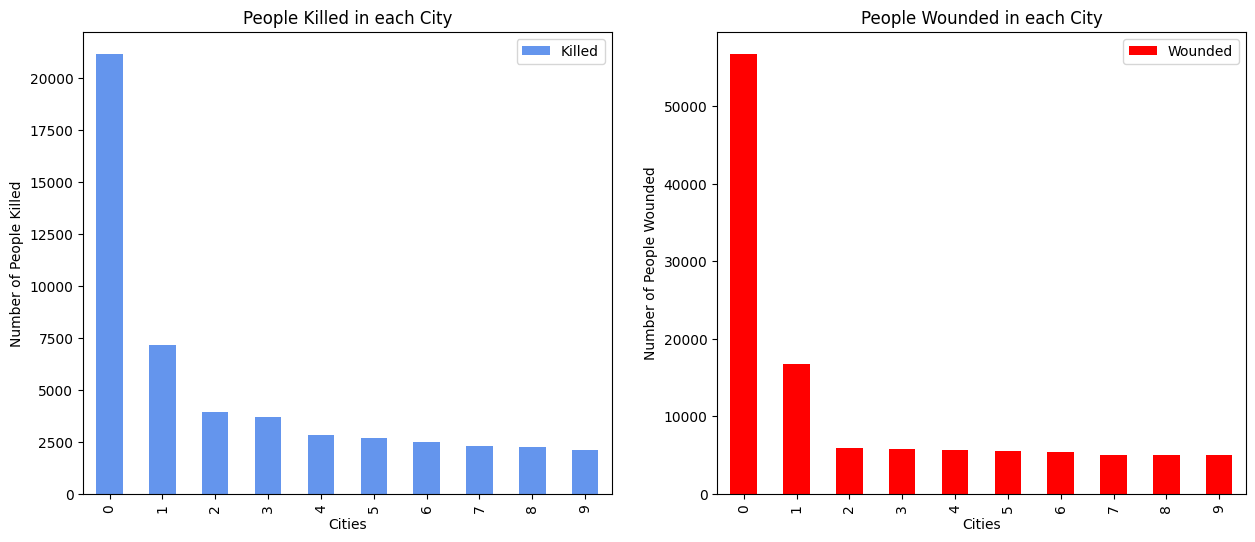

In [32]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
city_killed.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
city_wounded.plot(kind="bar",color="red",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

## Observations --

 -->  Killed
*   Most number of people killed: **21151** in "Baghdad"
*   Least number of people killed: **2125** in "Aleppo"


-- >  Wounded
*   Most number of people wounded: **56725** in "Baghdad"
*   Least number of people wounded: **4955** in "Mogadishu"









--------------------------------------------------------------------------------

# Terrorist Group wise Attack - Top 10

In [33]:
group_attacks = df['Group Name'].value_counts().drop("Unknown").to_frame().reset_index().rename(columns = {'index':"City"}).head(10)
group_attacks

,City,Group Name
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


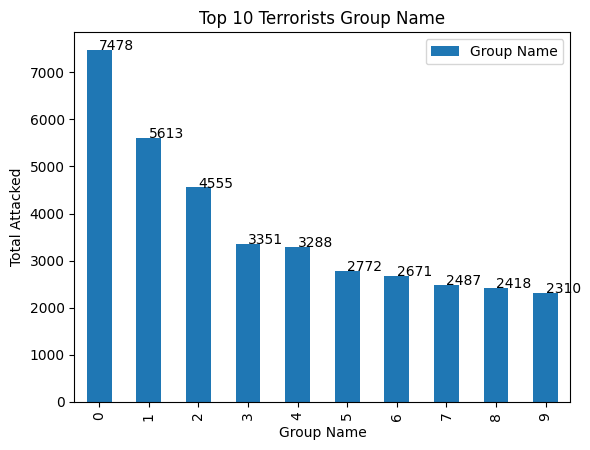

In [34]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = group_attacks['City']
    y = group_attacks['Group Name']

group_attacks.plot(kind = 'bar')
addlabels(x,y)
plt.title("Top 10 Terrorists Group Name")
plt.xlabel("Group Name")
plt.ylabel("Total Attacked")
plt.show()

## Observations -- Terrorist Group wise Attack - Top 10
*  Most number of attacks : **7478** by "Taliban"
*  Least number of attacks : **2310**  by "Kurdistan Workers' Party (PKK)	"



--------------------------------------------------------------------------------

## - Top 10 Casaulity by Group Name

In [73]:
casaulity_group = df[['Group Name','Total_Affected']].groupby("Group Name").sum().sort_values(by = 'Total_Affected', ascending = False).drop("Unknown").reset_index().rename(columns = {"index":"Group Name"}).head(10)
casaulity_group

,Group Name,Total_Affected
0,Islamic State of Iraq and the Levant (ISIL),58223.0
1,Taliban,54459.0
2,Al-Qaida,28340.0
3,Liberation Tigers of Tamil Eelam (LTTE),20859.0
4,Boko Haram,20305.0
5,Tehrik-i-Taliban Pakistan (TTP),15314.0
6,Al-Shabaab,14541.0
7,Al-Qaida in Iraq,14410.0
8,Shining Path (SL),14059.0
9,Farabundo Marti National Liberation Front (FMLN),11444.0


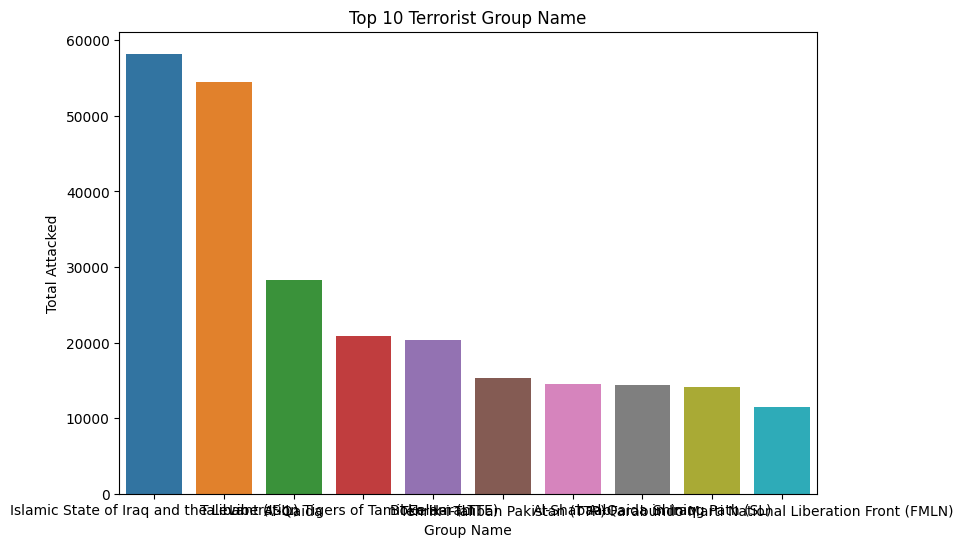

In [74]:
plt.figure(figsize = (9,6))
sns.barplot(x = casaulity_group['Group Name'], y = casaulity_group['Total_Affected'] )
plt.title("Top 10 Terrorist Group Name")
plt.xlabel("Group Name")
plt.ylabel("Total Attacked")
plt.show()

## Observations -- Top 10 Casaulity by Group Name

*   Most number of casualties : **58223** by "Islamic State of Iraq and the Levant(ISIL)"

*   Least number of casualties : **11444** by "Farabundo Marti National Liberation Front (FMLN)"



--------------------------------------------------------------------------------

# -- Terrorists Attacked using Attack Types

In [77]:
attack_type = df['Attack Type'].value_counts().drop('Unknown')
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

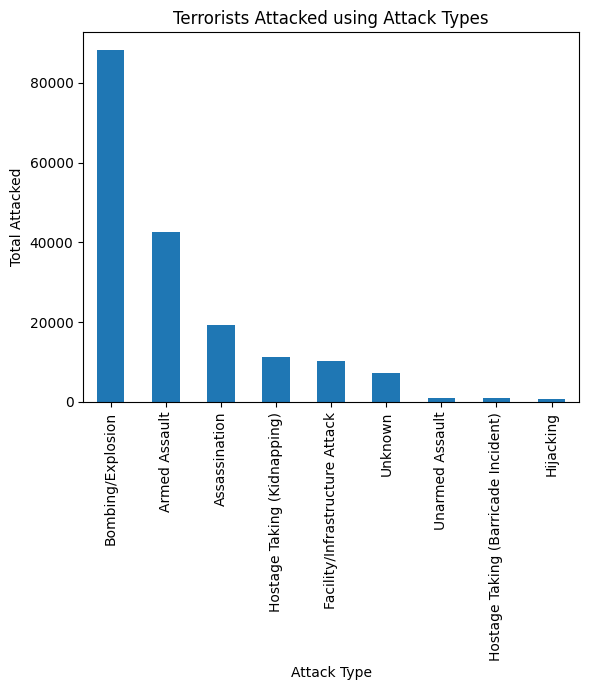

In [38]:
attack_type.plot(kind = 'bar')
plt.title("Terrorists Attacked using Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Total Attacked")
plt.show()

## Observations -- Terrorists Attacked using Attack Types

*   Most number of attacks : **88255** over "Bombing/Explosion"
*   Least number of attacks : **659** over "Hijacking"



--------------------------------------------------------------------------------

## -- Total Casuality by Attack Type

In [78]:
casaulity_attack_type = df[["Attack Type","Total_Affected"]].groupby("Attack Type").sum().sort_values(by = 'Total_Affected', ascending = False)
casaulity_attack_type

,Total_Affected
Attack Type,
Bombing/Explosion,514233.0
Armed Assault,212386.0
Unknown,39606.0
Assassination,37209.0
Hijacking,20642.0
Hostage Taking (Kidnapping),20267.0
Unarmed Assault,14791.0
Hostage Taking (Barricade Incident),7465.0
Facility/Infrastructure Attack,6293.0


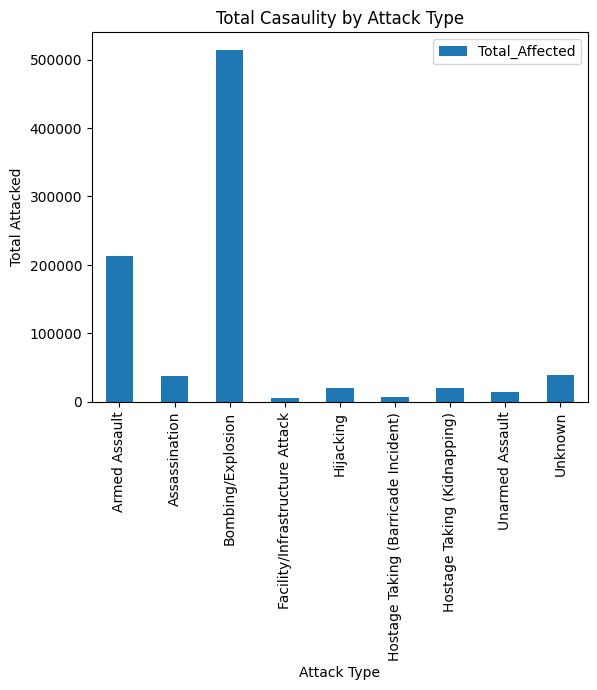

In [40]:
casaulity_attack_type.plot(kind = 'bar')
plt.title("Total Casaulity by Attack Type")
plt.ylabel("Total Attacked")
plt.show()

## Observations -- Total Casuality by Attack Type

*   Most number of casualties : **530007** by "Bombing/Explosion"
*   Least number of casualties : **6293** by "Facility/Infrastructure Attack"



--------------------------------------------------------------------------------

# -- Target Type wise attacks

In [41]:
target_type = df['Target Type'].value_counts().to_frame()
target_type

,Target Type
Private Citizens & Property,43511
Military,27984
Police,24506
Government (General),21283
Business,20669
Transportation,6799
Utilities,6023
Unknown,5898
Religious Figures/Institutions,4440
Educational Institution,4322


<Figure size 1200x900 with 0 Axes>

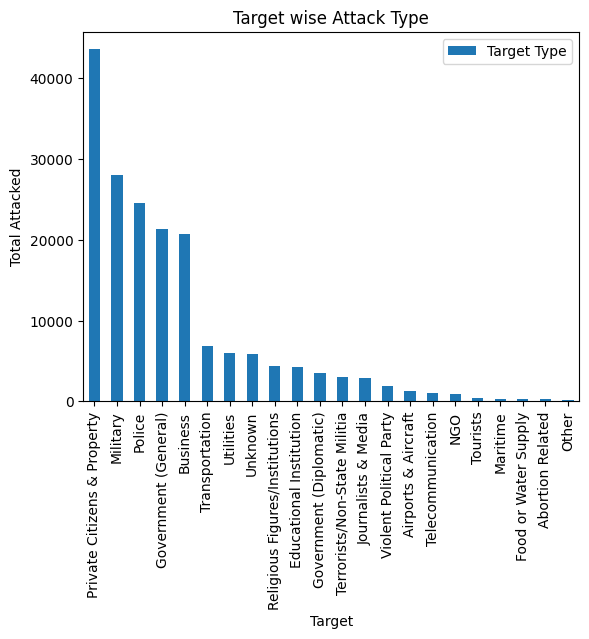

In [42]:
plt.figure(figsize = (12,9))
target_type.plot(kind = 'bar')
plt.title("Target wise Attack Type")
plt.xlabel("Target")
plt.ylabel("Total Attacked")
plt.show()


## Observations -- Target Type wise attacks
*   Most number of attacks : **43511** over "Private Citizens & Property"
*    Least number of attacks : **263** over "Abortion Related"



--------------------------------------------------------------------------------

## -- Casaulity with Target Type

In [43]:
casaulity_target_type = df[["Target Type",'Total_Affected']].groupby("Target Type").sum().sort_values(by ='Total_Affected',ascending = False)
casaulity_target_type

,Total_Affected
Target Type,
Private Citizens & Property,295314.0
Military,155194.0
Police,113272.0
Business,75477.0
Government (General),64957.0
Transportation,53791.0
Religious Figures/Institutions,36031.0
Terrorists/Non-State Militia,15617.0
Educational Institution,13574.0


<Figure size 1200x900 with 0 Axes>

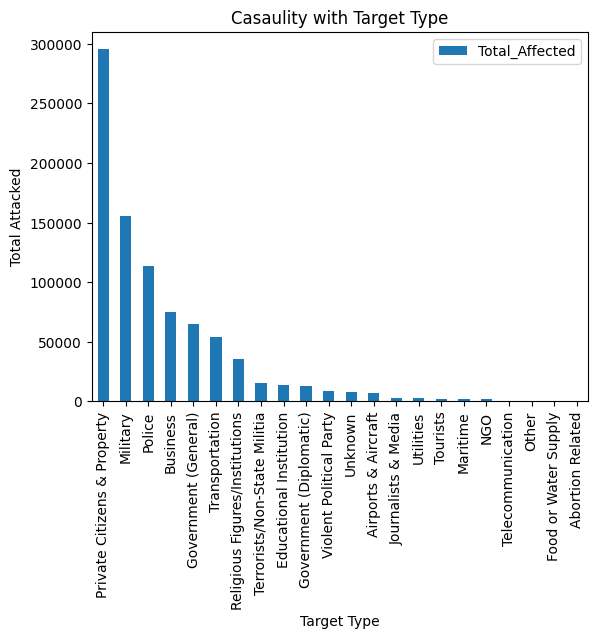

In [44]:
plt.figure(figsize = (12,9))
casaulity_target_type.plot(kind = 'bar')
plt.title("Casaulity with Target Type")
plt.ylabel("Total Attacked")
plt.show()

## Observations -- Casaulity with Target Type

*   Most number of casualties : **295314** over "Private Citizens & Property"
*  Least number of casualties : **55** over "Abortion Related"



--------------------------------------------------------------------------------

# -- Top 10 Group Name with their Native Country

In [45]:
country_group = df[['Group Name','Country']].value_counts().drop("Unknown").to_frame().head(10)
country_group

,,0
Group Name,Country,
Taliban,Afghanistan,7423
Islamic State of Iraq and the Levant (ISIL),Iraq,4797
Shining Path (SL),Peru,4541
Farabundo Marti National Liberation Front (FMLN),El Salvador,3330
Al-Shabaab,Somalia,2867
New People's Army (NPA),Philippines,2770
Irish Republican Army (IRA),United Kingdom,2575
Revolutionary Armed Forces of Colombia (FARC),Colombia,2468
Kurdistan Workers' Party (PKK),Turkey,2109


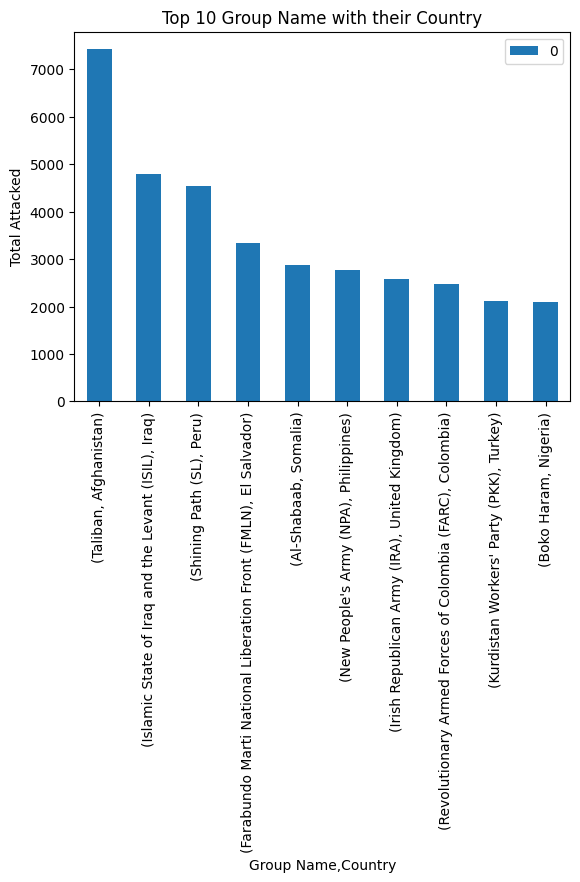

In [46]:
country_group.plot(kind = "bar")
plt.title("Top 10 Group Name with their Country")
plt.ylabel("Total Attacked")
plt.show()

## Observations -- Top 10 Group Name with their Native Country

*   Most number of attacks : **7423** by "Taliban" in "Afghanistan"ia"
*   Least number of attacks : 2087 by "Boko Haram" in "Nigeria"



--------------------------------------------------------------------------------

## -- Top 10 Casaulity which was attacked by Group Name with their Country

In [79]:
casaulity_group_name = df[["Group Name","Country","Total_Affected"]].groupby(["Group Name","Country"],axis = 0).sum().drop("Unknown").sort_values(by = "Total_Affected", ascending = False).reset_index().head(10)
casaulity_group_name

,Group Name,Country,Total_Affected
0,Taliban,Afghanistan,54260.0
1,Islamic State of Iraq and the Levant (ISIL),Iraq,47279.0
2,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,20758.0
3,Al-Qaida,United States,19494.0
4,Boko Haram,Nigeria,16315.0
5,Tehrik-i-Taliban Pakistan (TTP),Pakistan,15272.0
6,Shining Path (SL),Peru,14052.0
7,Al-Qaida in Iraq,Iraq,14034.0
8,Al-Shabaab,Somalia,12020.0
9,Farabundo Marti National Liberation Front (FMLN),El Salvador,11382.0


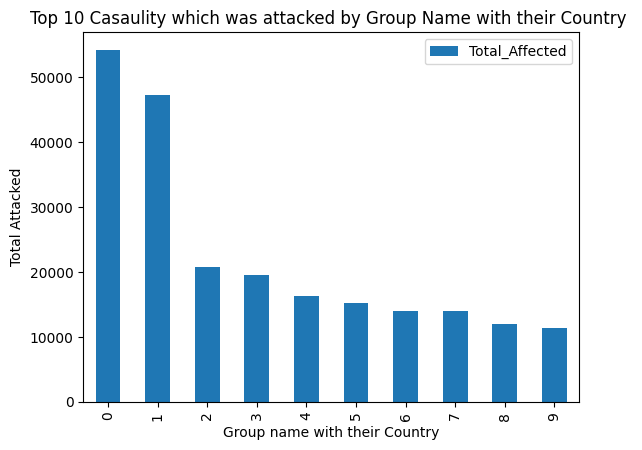

In [80]:
casaulity_group_name.plot(kind = 'bar')
plt.title("Top 10 Casaulity which was attacked by Group Name with their Country ")
plt.ylabel("Total Attacked")
plt.xlabel("Group name with their Country")
plt.show()

## Observations -- Top 10 Casaulity which was attacked by Group Name with their Country

*   Most number of casualties : **54260** by "Taliban" in "Afghanistan"
*   Least number of casualties : **11382** by "Farabundo Marti National Liberation Front (FMLN)" in "El Salvador"



--------------------------------------------------------------------------------

## -- Humans Affected by Terrorist Attacks worldwide from 1970 to 2017

In [49]:
casaulity = df["Total_Affected"].sum()
print(" Total Casaulity due to Terrorist attack from 1970 to 2017 is :",casaulity)

 Total Casaulity due to Terrorist attack from 1970 to 2017 is : 872892.0


## -- Total People Killed by Terrorist attacks

In [50]:
killed = df['Killed'].sum()
print(" Total killed due to Terrorist attack from 1970 to 2017 is :",killed)

 Total killed due to Terrorist attack from 1970 to 2017 is : 411868.0


## -- Total people Wouded which were affected by Terrorist attacks

In [51]:
wounded = df['Wounded'].sum()
print("Total Pople wounded which were affected by Terrorst Attacks - ",wounded)

Total Pople wounded which were affected by Terrorst Attacks -  523869.0


--------------------------------------------------------------------------------

#  Particular Country Terrorism Analysis - India

In [52]:
Terrorist_Attacks_in_India = df[(df['Country'] == 'India')]
Terrorist_Attacks_in_India.head(5)

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Total_Affected
1186,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,Hijacking,Airports & Aircraft,Palestinians,NaN,Explosives,0.0,0.0,0.0
2764,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,The attack occurred in the town,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,4.0
3857,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,Bombing/Explosion,Airports & Aircraft,Unknown,NaN,Explosives,0.0,0.0,0.0
5327,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,NaN,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),NaN,Firearms,0.0,0.0,0.0
7337,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,NaN,Armed Assault,Police,Naga People,NaN,Firearms,NaN,NaN,NaN


## --  Year Wise Terrorist Attacked in India

In [82]:
Terrorist_Attacks_in_India_year = Terrorist_Attacks_in_India['Year'].value_counts().to_frame().reset_index().rename(columns = {'index':"Year",
                                                                                                                                      "Year":"Total_Attacks"}).sort_values(by = 'Total_Attacks', ascending = False)
Terrorist_Attacks_in_India_year.head(10)

,Year,Total_Attacks
0,2016,1025
1,2017,966
2,2015,884
3,2014,860
4,2013,694
5,2009,672
6,2010,663
7,2011,645
8,2012,611
9,2008,534


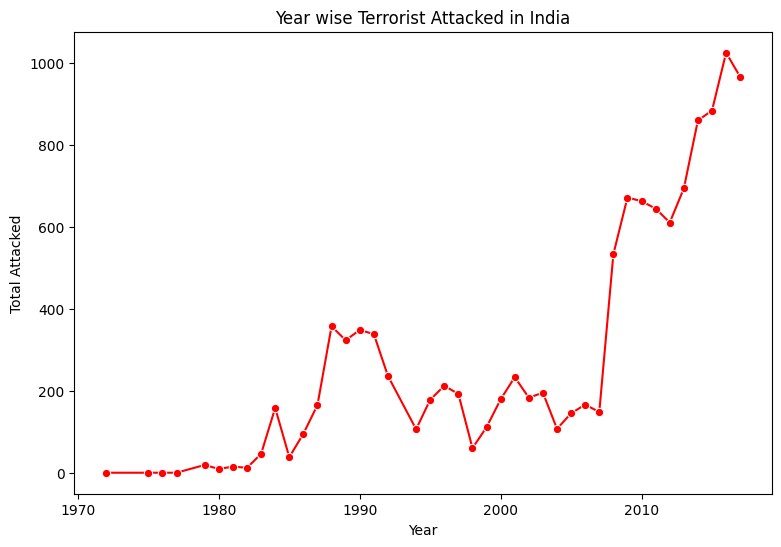

In [54]:
plt.figure(figsize=(9,6))
sns.lineplot(x = Terrorist_Attacks_in_India_year["Year"], y = Terrorist_Attacks_in_India_year["Total_Attacks"],color = 'r', marker = 'o')
plt.title("Year wise Terrorist Attacked in India")
plt.xlabel("Year")
plt.ylabel("Total Attacked")
plt.show()

## Observations -- Year Wise Terrorist Attacked in India

*   Most number of attacks: **1025** in 2016
*   Least number of attacks: **1** in 1972, 1975, 1976, 1977



--------------------------------------------------------------------------------

## -- Top 10 Indian City by Attacked

In [55]:
Terrorist_Attacks_in_India_city = Terrorist_Attacks_in_India['City'].value_counts().drop("Unknown").head(10).to_frame().reset_index().rename(columns = {"index" : "City","City": "Total_Attack"})
Terrorist_Attacks_in_India_city

,City,Total_Attack
0,Srinagar,658
1,Imphal,426
2,New Delhi,157
3,Amritsar,138
4,Sopore,102
5,Ludhiana,77
6,Guwahati,77
7,Anantnag,76
8,Jammu,57
9,Latehar district,55


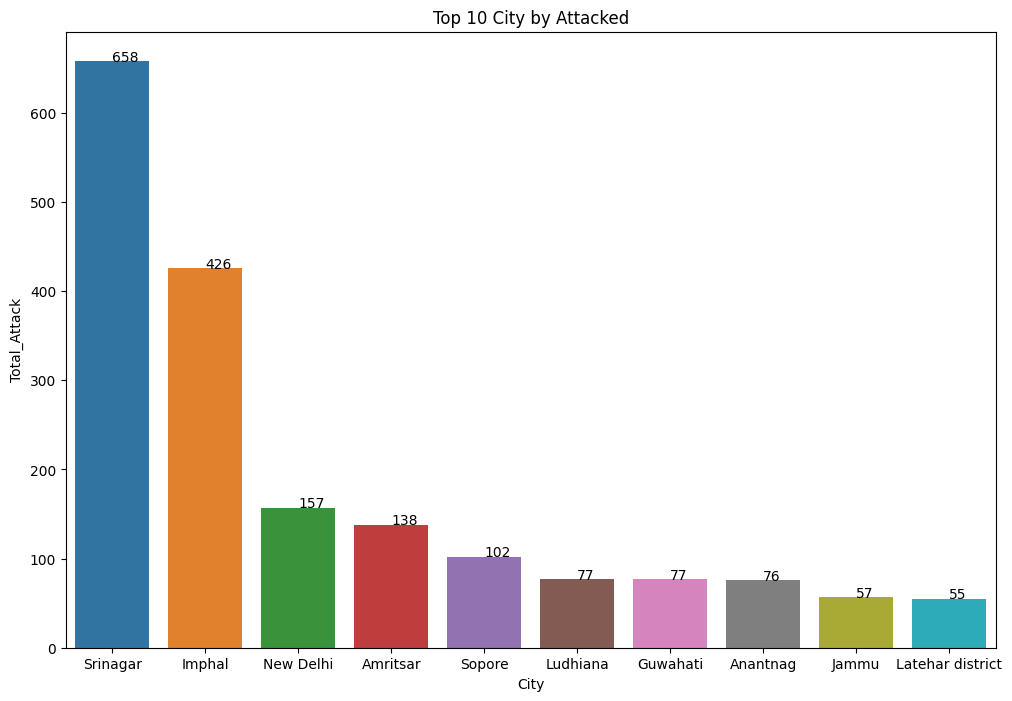

In [56]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

if __name__ == '__main__':
    x = Terrorist_Attacks_in_India_city['City']
    y = Terrorist_Attacks_in_India_city['Total_Attack']

plt.figure(figsize=(12,8))
sns.barplot(x = Terrorist_Attacks_in_India_city['City'], y =Terrorist_Attacks_in_India_city['Total_Attack'])
addlabels(x,y)
plt.title("Top 10 City by Attacked")
plt.show()

## Observations -- Top 10 Indian City by Attacked


*   Most number of attacks: **658** in "Srinagar"
*   Least number of attacks: **55** in "	Latehar district"



--------------------------------------------------------------------------------

## -- Top 10 Indian State  Attacked by Terrorists

In [57]:
Terrorist_Attacks_in_India_state = Terrorist_Attacks_in_India['Province/State'].value_counts().to_frame().reset_index().rename(columns = {"index":"State","Province/State":"Total_Attacks"}).head(10)
Terrorist_Attacks_in_India_state

,State,Total_Attacks
0,Jammu and Kashmir,2454
1,Assam,1151
2,Manipur,1100
3,Chhattisgarh,979
4,Punjab,949
5,Jharkhand,887
6,Bihar,688
7,West Bengal,650
8,Odisha,428
9,Maharashtra,302


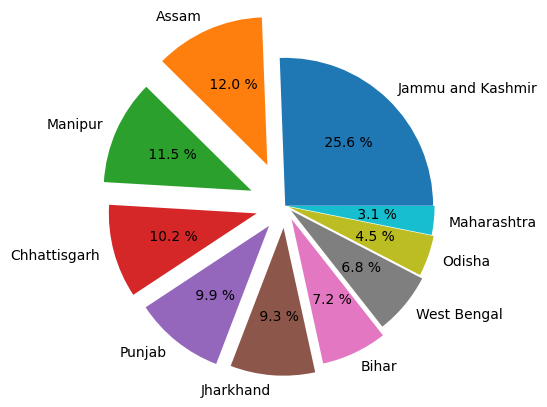

In [58]:
explode = (0.0, 0.3, 0.25, 0.20, 0.175, 0.15, 0.1, 0.05, 0.025, 0.010)

plt.pie(Terrorist_Attacks_in_India_state['Total_Attacks'],
  labels = Terrorist_Attacks_in_India_state['State'],
  explode = explode ,
  autopct ='% 1.1f %%')
plt.show()

## Observations -- Top 10 Indian State  Attacked by Terrorists

*   Most number of attacks: **2454** and **25.6%** in "Jammu and Kashmir"
*   Least number of attacks: **302** and **3.1%** in "Maharashtra"


--------------------------------------------------------------------------------

## -- Top 10 Attack Type used by Terrorist in India

In [59]:
 Terrorist_Attacks_in_India_attack_type = Terrorist_Attacks_in_India['Attack Type'].value_counts().to_frame().reset_index().rename(columns = {"index":'Attack Type',"Attack Type":'Total_Attack_Type'})
 Terrorist_Attacks_in_India_attack_type

,Attack Type,Total_Attack_Type
0,Bombing/Explosion,4825
1,Armed Assault,3184
2,Assassination,1229
3,Hostage Taking (Kidnapping),1184
4,Facility/Infrastructure Attack,996
5,Unknown,312
6,Unarmed Assault,143
7,Hostage Taking (Barricade Incident),44
8,Hijacking,43


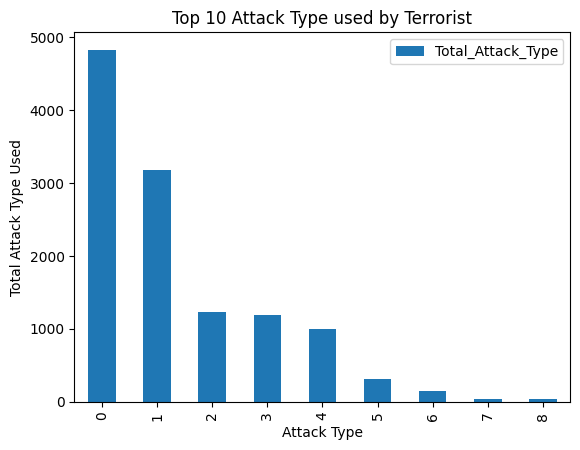

In [60]:
Terrorist_Attacks_in_India_attack_type.plot(kind = 'bar')
plt.title("Top 10 Attack Type used by Terrorist")
plt.xlabel("Attack Type")
plt.ylabel("Total Attack Type Used")
plt.show()

## Observations -- Top 10 Attack Type used by Terrorist in India

*  Most number of attacks type used: **4825** by "Bombing/Explosion"
*  Least number of attacks type used: **43** by "Hijacking"



--------------------------------------------------------------------------------

## -- Top 10 Indian State where people were killed by Terrorists

In [83]:
Terrorist_Attacks_in_India_state_killed = Terrorist_Attacks_in_India[['Province/State','Killed']].groupby('Province/State').sum().sort_values(by = 'Killed',
                                                                                                                      ascending = False).drop("Unknown").reset_index().rename(columns = {"index":'State'}).head(10)
Terrorist_Attacks_in_India_state_killed

,Province/State,Killed
0,Jammu and Kashmir,4079.0
1,Punjab,2751.0
2,Assam,2112.0
3,Chhattisgarh,1465.0
4,Maharashtra,1010.0
5,Jharkhand,796.0
6,Bihar,765.0
7,Manipur,747.0
8,West Bengal,671.0
9,Andhra Pradesh,543.0


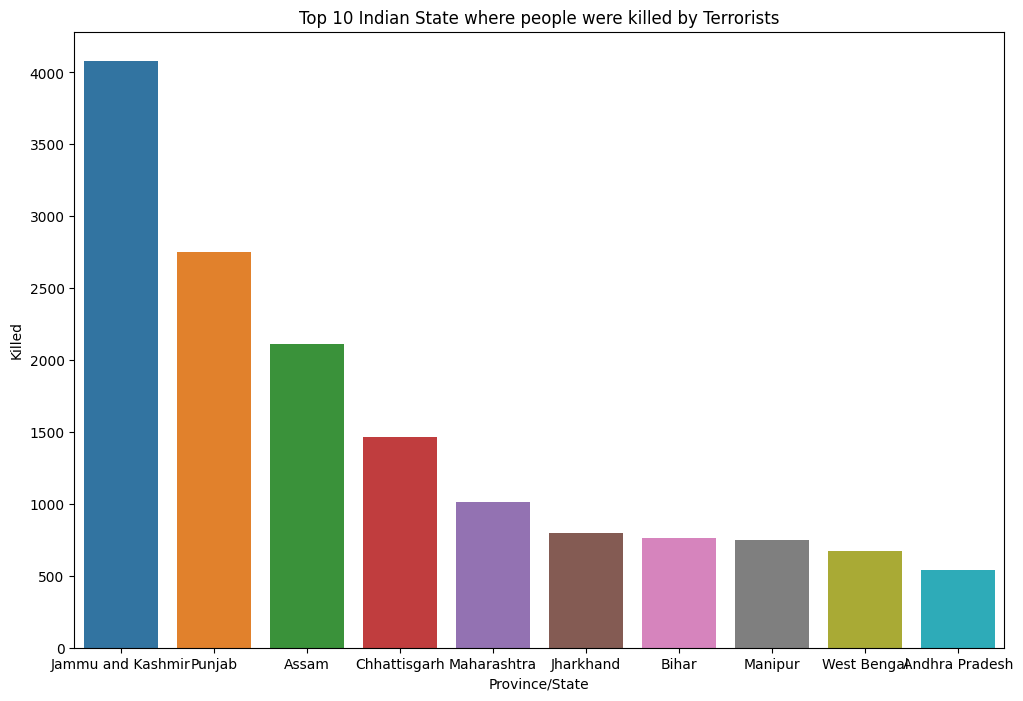

In [84]:
plt.figure(figsize = (12,8))
sns.barplot(x = Terrorist_Attacks_in_India_state_killed['Province/State'],y= Terrorist_Attacks_in_India_state_killed['Killed'])
plt.title("Top 10 Indian State where people were killed by Terrorists")
plt.show()

## Observations -- Top 10 Indian State where people were killed by Terrorists

*   Most People Killed in State : **4079** in "Jammu and Kashmir"
*   Least People Killed in State : **543** in "Andhra Pradesh"



--------------------------------------------------------------------------------

## -- Total Casaulity in India from 1970 to 2017

In [63]:
Terrorist_Attacks_in_India['Total_Affected'].sum()

47108.0

## -- Total People Killed By Terrorists between 1970 to 2017

In [64]:
Terrorist_Attacks_in_India['Killed'].sum()

19341.0

## -- Total People Wounded By Terrorists in India between 1970 to 2017

In [65]:
Terrorist_Attacks_in_India['Wounded'].sum()

28980.0




```
Author - Hitesh Choudhary
Thank You!
```






